# ***Cricket Statistics***

**Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cricket_data_2025.csv")

In [3]:
df.sample(5)

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
507,2020.0,Mitchell Santner,2,0,0,0,0.00,0,0.0,0,...,2,42,53,2,1/23,26.5,7.57,21.0,0,0
585,2018.0,Nitish Rana,15,2,304,59,23.38,232,131.03,0,...,15,37,44,4,2/11,11.00,7.13,9.25,0,0
44,2023.0,Akash Deep,2,0,17,17,17.00,8,212.5,0,...,2,30,59,1,1/29,59.0,11.8,30.0,0,0
129,2016.0,Bhuvneshwar Kumar,17,2,43,21,7.16,27,159.25,0,...,17,396,490,23,4/29,21.3,7.42,17.21,1,0
6,NaN,Abhinandan Singh,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,...,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats


**Missing or 'No Stats' values**

In [4]:
df.replace("No Stats", pd.NA, inplace = True)
df.isnull().sum()

Year                   51
Player_Name             0
Matches_Batted          0
Not_Outs                0
Runs_Scored             0
Highest_Score           0
Batting_Average         0
Balls_Faced             0
Batting_Strike_Rate     0
Centuries               0
Half_Centuries          0
Fours                   0
Sixes                   0
Catches_Taken           0
Stumpings               0
Matches_Bowled          0
Balls_Bowled            0
Runs_Conceded           0
Wickets_Taken           0
Best_Bowling_Match      0
Bowling_Average         0
Economy_Rate            0
Bowling_Strike_Rate     0
Four_Wicket_Hauls       0
Five_Wicket_Hauls       0
dtype: int64

In [5]:
numeric_cols = ["Year", "Matches_Batted", "Not_Outs", "Runs_Scored", 
                "Balls_Faced", "Batting_Average", "Batting_Strike_Rate", 
                "Centuries", "Half_Centuries", "Fours", "Sixes",
                "Matches_Bowled", "Balls_Bowled", "Runs_Conceded",
                "Wickets_Taken", "Bowling_Average", "Economy_Rate",
                "Bowling_Strike_Rate", "Four_Wicket_Hauls", "Five_Wicket_Hauls"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 957 non-null    float64
 1   Player_Name          1008 non-null   object 
 2   Matches_Batted       957 non-null    float64
 3   Not_Outs             957 non-null    float64
 4   Runs_Scored          957 non-null    float64
 5   Highest_Score        1008 non-null   object 
 6   Batting_Average      957 non-null    float64
 7   Balls_Faced          957 non-null    float64
 8   Batting_Strike_Rate  957 non-null    float64
 9   Centuries            957 non-null    float64
 10  Half_Centuries       957 non-null    float64
 11  Fours                957 non-null    float64
 12  Sixes                957 non-null    float64
 13  Catches_Taken        1008 non-null   object 
 14  Stumpings            1008 non-null   object 
 15  Matches_Bowled       958 non-null    f

In [6]:
df.dropna(subset=["Runs_Scored", "Balls_Faced", "Wickets_Taken"], inplace=True)

In [7]:
df.isnull().sum()

Year                   0
Player_Name            0
Matches_Batted         0
Not_Outs               0
Runs_Scored            0
Highest_Score          0
Batting_Average        0
Balls_Faced            0
Batting_Strike_Rate    0
Centuries              0
Half_Centuries         0
Fours                  0
Sixes                  0
Catches_Taken          0
Stumpings              0
Matches_Bowled         0
Balls_Bowled           0
Runs_Conceded          0
Wickets_Taken          0
Best_Bowling_Match     0
Bowling_Average        0
Economy_Rate           0
Bowling_Strike_Rate    0
Four_Wicket_Hauls      0
Five_Wicket_Hauls      0
dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of         Year       Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
1     2024.0       Abdul Samad            16.0       2.0        182.0   
2     2023.0       Abdul Samad             9.0       4.0        169.0   
3     2022.0       Abdul Samad             2.0       0.0          4.0   
4     2021.0       Abdul Samad            11.0       1.0        111.0   
5     2020.0       Abdul Samad            12.0       3.0        111.0   
...      ...               ...             ...       ...          ...   
1002  2017.0  Yuzvendra Chahal            13.0       3.0         13.0   
1003  2016.0  Yuzvendra Chahal            13.0       0.0          0.0   
1004  2015.0  Yuzvendra Chahal            15.0       2.0          1.0   
1005  2014.0  Yuzvendra Chahal            14.0       2.0          1.0   
1006  2013.0  Yuzvendra Chahal             1.0       0.0          0.0   

     Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
1              3

**Outliers**

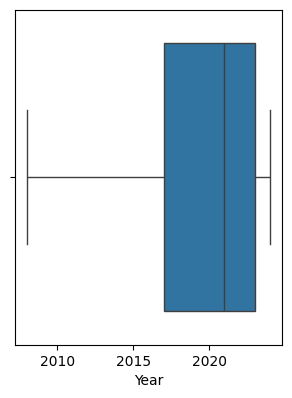

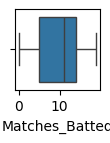

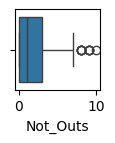

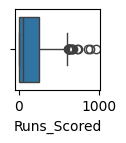

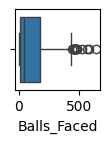

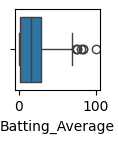

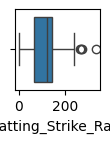

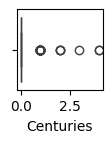

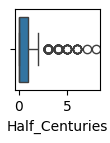

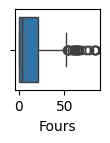

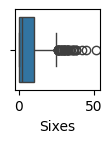

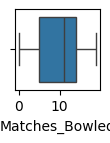

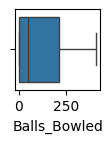

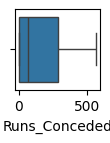

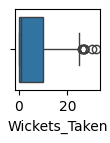

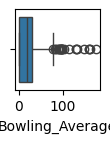

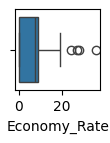

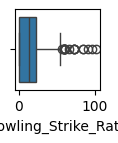

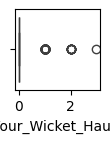

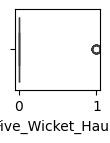

In [11]:
plt.figure(figsize = (20,20))
for i, col in enumerate (["Year", "Matches_Batted", "Not_Outs", "Runs_Scored", 
                "Balls_Faced", "Batting_Average", "Batting_Strike_Rate", 
                "Centuries", "Half_Centuries", "Fours", "Sixes",
                "Matches_Bowled", "Balls_Bowled", "Runs_Conceded",
                "Wickets_Taken", "Bowling_Average", "Economy_Rate",
                "Bowling_Strike_Rate", "Four_Wicket_Hauls", "Five_Wicket_Hauls"]):
    plt.subplot(4,5, i+1)
    sns.boxplot(x = col, data = df)
    plt.show()

**Data Visualisation**

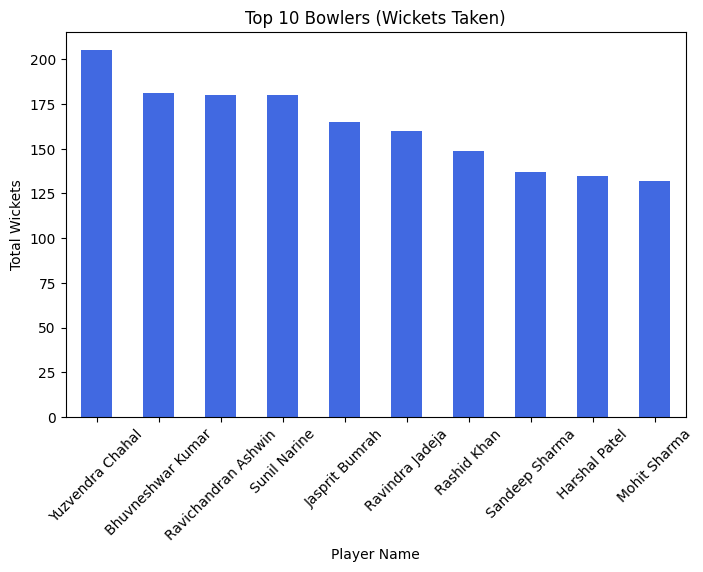

In [17]:
#Top 10 Bowlers in terms of wicket taken
top_bowlers = df.groupby("Player_Name")["Wickets_Taken"].sum().nlargest(10)
top_bowlers.plot(kind="bar", color="royalblue", figsize=(8, 5))
plt.title("Top 10 Bowlers (Wickets Taken)")
plt.xlabel("Player Name")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.show()


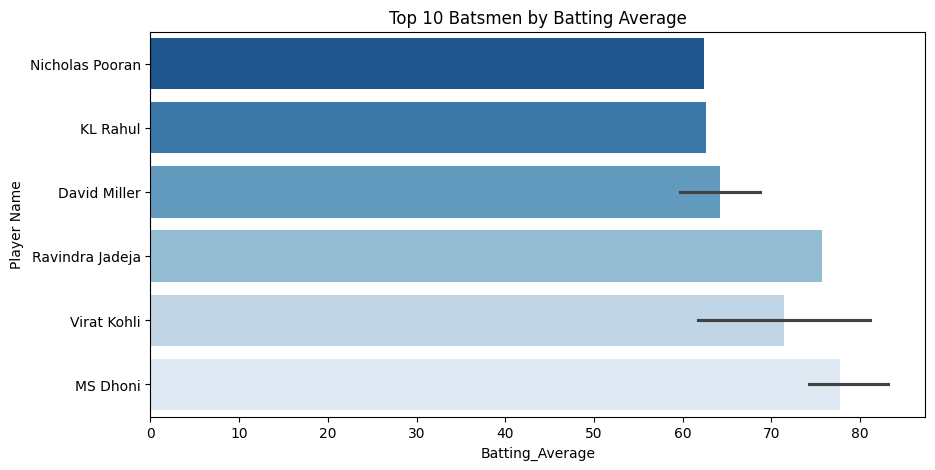

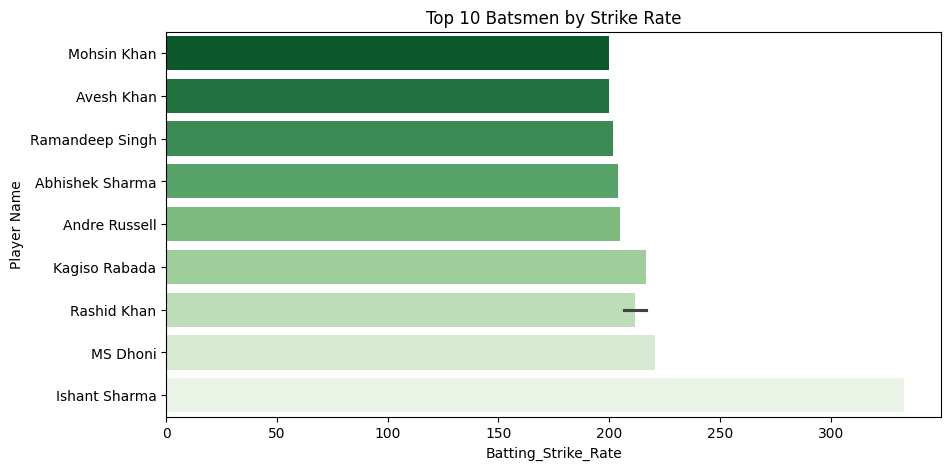

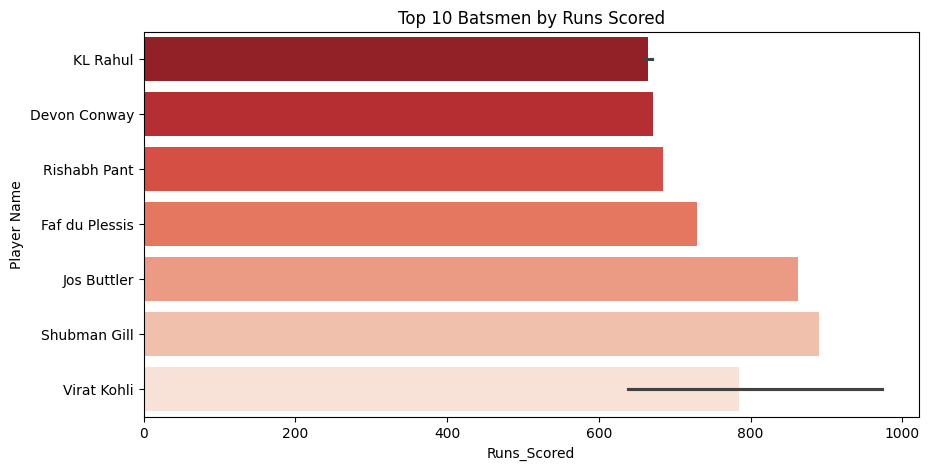

In [15]:
df_filtered = df[df["Matches_Batted"] >= 10]

top_avg = df_filtered.nlargest(10, "Batting_Average")

top_sr = df_filtered.nlargest(10, "Batting_Strike_Rate")

top_runs = df_filtered.nlargest(10, "Runs_Scored")

def plot_top_players(df, column, title, color):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df[column], y=df["Player_Name"], hue=df["Player_Name"], palette=color, legend=False)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Player Name")
    plt.gca().invert_yaxis()
    plt.show()

plot_top_players(top_avg, "Batting_Average", "Top 10 Batsmen by Batting Average", "Blues")
plot_top_players(top_sr, "Batting_Strike_Rate", "Top 10 Batsmen by Strike Rate", "Greens")
plot_top_players(top_runs, "Runs_Scored", "Top 10 Batsmen by Runs Scored", "Reds")

**Correlation Analysis**

In [ ]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

df = pd.read_csv("cleaned_cricket_data.csv")

int_cols = ["Year", "Matches_Batted", "Not_Outs", "Runs_Scored", "Balls_Faced", 
            "Centuries", "Half_Centuries", "Fours", "Sixes", "Matches_Bowled", 
            "Balls_Bowled", "Runs_Conceded", "Wickets_Taken", "Four_Wicket_Hauls", 
            "Five_Wicket_Hauls", "Catches_Taken", "Stumpings"] 

df[int_cols] = df[int_cols].astype(int)


In [ ]:
df.to_csv("cleaned_cricket_data.csv", index=False)